In [151]:
# import one set of data

import pylab as py

# open files
f_x1 = open('C:\\Users\\abarrett.BNL\\Data\\Cu_foil_spec1.txt','r')
# f_y1 = open('C:\\Users\\abarrett.BNL\\Data\\y1.txt','r')

# import data
x1 = []
y1 = [] 

for line in f_x1 :
	x1.append(line)

# for line in f_y1 : 
# 	y1.append(float(line))

# py.plot(x1,y1)
# py.show()

f_x1.close()
# f_y1.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\abarrett.BNL\\Data\\Cu_foil_spec1.txt'

C:\Users\abarrett.BNL\Data\2017.07.20\Cu\1 Single Spectrum_012_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\1 Single Spectrum_012_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\2 Single Spectrum_013_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\2 Single Spectrum_013_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\3 Single Spectrum_014_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2017.07.20\Cu\3 Single Spectrum_014_Spec.Data 1 (Y-Axis).txt


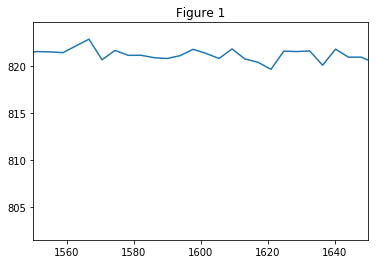

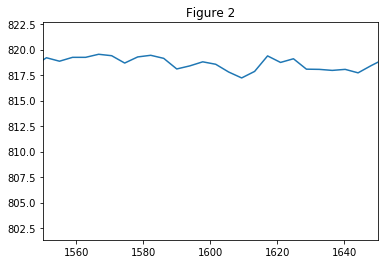

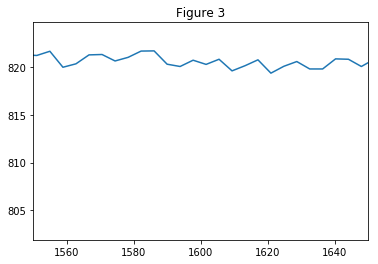

In [39]:
# import data for batch processing

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Cu'

# import data from each file
data = np.array([])
for filename in os.listdir(path):
    fpath = path + '\\' + filename
    print(fpath)
    f = open(fpath,'r')
    x = []
    for line in f:
        x.append(float(line))    
    data = np.append(data, x)
    f.close()

# reshape into matrix, each file has its own row
# ORDERING ISSUE HERE
num_files = len(os.listdir(path))
data = data.reshape(num_files, len(data) // num_files)

# iteratively plot data 
idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i)
    py.title('Figure ' + str(i+1))
    py.plot(data[2*i],data[2*i + 1])
    py.xlim(1550,1650)
    py.show()

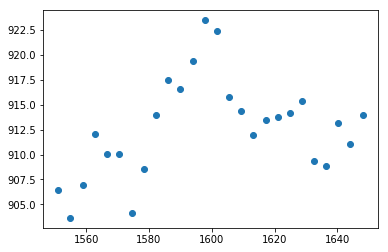

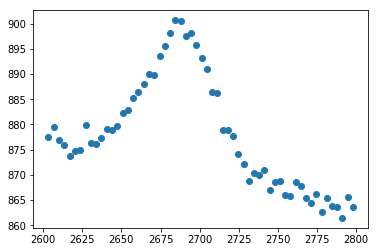

In [92]:
# automatically select the appropriate ranges in the data (one measurment)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# convert to numpy arrays
x1_np = np.array(x1)
y1_np = np.array(y1)

# select G peak
x1_G = x1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]
y1_G = y1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]

# select 2D peak
x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(1)
py.scatter(x1_G,y1_G)

plt.figure(2)
py.scatter(x1_2D,y1_2D)


In [10]:
# automatically select peak ranges (batch processing)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# select peaks
data_G = np.array([])
data_2D = np.array([])
idx = data.shape[0] // 2
for i in range(data.shape[0]):
    if i < idx:
        row = data[i]
        row2 = row[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row2)
        row3 = row[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row3)
    else:    
        row = data[i - idx]
        row2 = data[i]
        row3 = row2[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row3)
        row4 = row2[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row4)
# each measurement is a row
data_G = data_G.reshape(idx*2, len(data_G) // (idx*2)) 
data_2D = data_2D.reshape(idx*2, len(data_2D) // (idx*2)) 

# iteratively plot data  
for i in range(idx):
    plt.figure(i)
    py.title('G Peak ' + str(i+1))
    py.scatter(data_G[i],data_G[i+idx])
    py.show()
for i in range(idx):
    plt.figure(i+idx)
    py.title('2D Peak ' + str(i+1))
    py.scatter(data_2D[i], data_2D[i+idx])
    py.show()
    


ValueError: cannot reshape array of size 104 into shape (6,17)

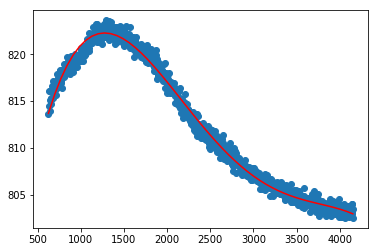

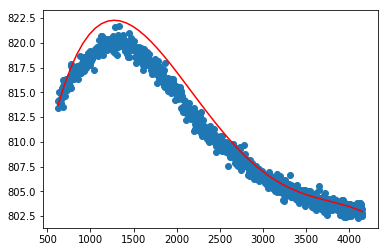

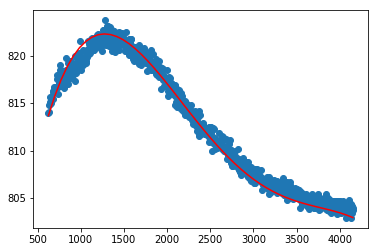

In [40]:
# copper polynomial curve fitting

from scipy.optimize import curve_fit

# degree of polynomial fit
degree = 4

# data to be fit
x = data[0,:]
y = data[1,:]

# def fit_func(x, a, b, c):
#     return a*(x**2) + b*x + c
# params = curve_fit(fit_func, x1, y1)
# [a, b, c] = params[0]

# calculate polynomial
z = np.polyfit(x, y, degree)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i+1)
    py.scatter(data[2*i],data[2*i + 1])
    py.plot(x_new,y_new,'-r')
    py.show()

In [150]:
# take heatmap text files and convert to csv

import csv

# text file to convert, file path for csv to create
txt_file = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\text5.txt'
csv_file = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\csv4.csv'

# create temp text file with header removed
with open(txt_file, 'r') as fin:
    data = fin.read().splitlines(True)
with open('temp.txt', 'w') as fout:
    fout.writelines(data[14:])

# write to csv    
in_txt = csv.reader(open('temp.txt'), delimiter = '\t')
output = csv.writer(open(csv_file, 'w'))
output.writerows(in_txt)

fin.close()
fout.close()


In [111]:
# Raman heatmap
# need to have data in .csv file 

import seaborn as sns

pathG = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\csv3.csv'
path2D = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\hmap2_csv.csv'

height_G = np.loadtxt(open(pathG, "rb"), delimiter=",", skiprows=1)
# height_2D = np.loadtxt(open(path2D, "rb"), delimiter=",", skiprows=1)
# ratio = height_2D / height_G

plt.figure(1)
plt.imshow(height_G, cmap='hot', interpolation='nearest')
plt.title('G Peak')
plt.colorbar()
plt.show()

# plt.figure(2)
# plt.imshow(height_2D, cmap='hot', interpolation='nearest')
# plt.title('2D Peak')
# plt.colorbar()
# plt.show()

# plt.figure(3)
# plt.imshow(ratio, cmap='hot', interpolation='nearest')
# plt.title('2D / G Ratio')
# plt.colorbar()
# plt.show()

# for line in g2:
#     print(line)

# plt.figure(4)
# sns.heatmap(height_2D, linewidth=0.5)
# plt.show()
